<a href="https://colab.research.google.com/github/emkrit/ML_DADS/blob/main/Assignment_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
import numpy as np
import plotly.graph_objects as go
sheet_url = 'https://docs.google.com/spreadsheets/d/11S7DYAfE74-2SB-7q5zsTSPjpA8IyCiA126ouxbXv98/edit#gid=1575860554'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df  = pd.read_csv(csv_export_url)



df['date'] = pd.to_datetime(df['date'])
df['amt'] = pd.to_numeric(df['amt'].str.replace(',', ''))
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df['year'] = df['date'].dt.year
df['year_str'] = df['year'].astype(str)
df['month'] = df['date'].dt.month_name()
month =  ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
df_filtered = df[df['year'].isin([2022, 2023])]

# Aggregate sales amounts by 'sale_adjust', month, and year
agg_df = df_filtered.groupby(['sale_adjust', 'month', 'year'])['amt'].sum().reset_index()



ball_2022 = agg_df[(agg_df['sale_adjust']=="Ball")&(agg_df['year']==2022)]['amt'].to_list()
ball_2023 = agg_df[(agg_df['sale_adjust']=="Ball")&(agg_df['year']==2023)]['amt'].to_list()
Sine_2022 = agg_df[(agg_df['sale_adjust']=="Sine")&(agg_df['year']==2022)]['amt'].to_list()
Sine_2023 = agg_df[(agg_df['sale_adjust']=="Sine")&(agg_df['year']==2023)]['amt'].to_list()
# Ao_2022 = agg_df[(agg_df['sale_adjust']=="Ao")&(agg_df['year']==2022)]['amt'].to_list()
# Ao_2023 = agg_df[(agg_df['sale_adjust']=="Ao")&(agg_df['year']==2023)]['amt'].to_list()

fig = go.Figure()

fig.add_trace(go.Scatter(x=month, y=ball_2022, name='sale#1_2022',
                         line=dict(color='royalblue', width=4,
                              dash='dash')))
fig.add_trace(go.Scatter(x=month, y=ball_2023, name = 'sale#1_2023',
                         line=dict(color='royalblue', width=4)))

fig.add_trace(go.Scatter(x=month, y=Sine_2022, name='sale#2_2022',
                         line=dict(color='firebrick', width=4,
                              dash='dash')))
fig.add_trace(go.Scatter(x=month, y=Sine_2023, name = 'sale#2_2023',
                         line=dict(color='firebrick', width=4)))


fig.update_layout(title='Comparing 2022 vs 2023 of sale performance',
                   xaxis_title='Month',
                   yaxis_title='monthly sale performance')


fig.show()

In [ ]:
#  3.1 Post the image of your chart


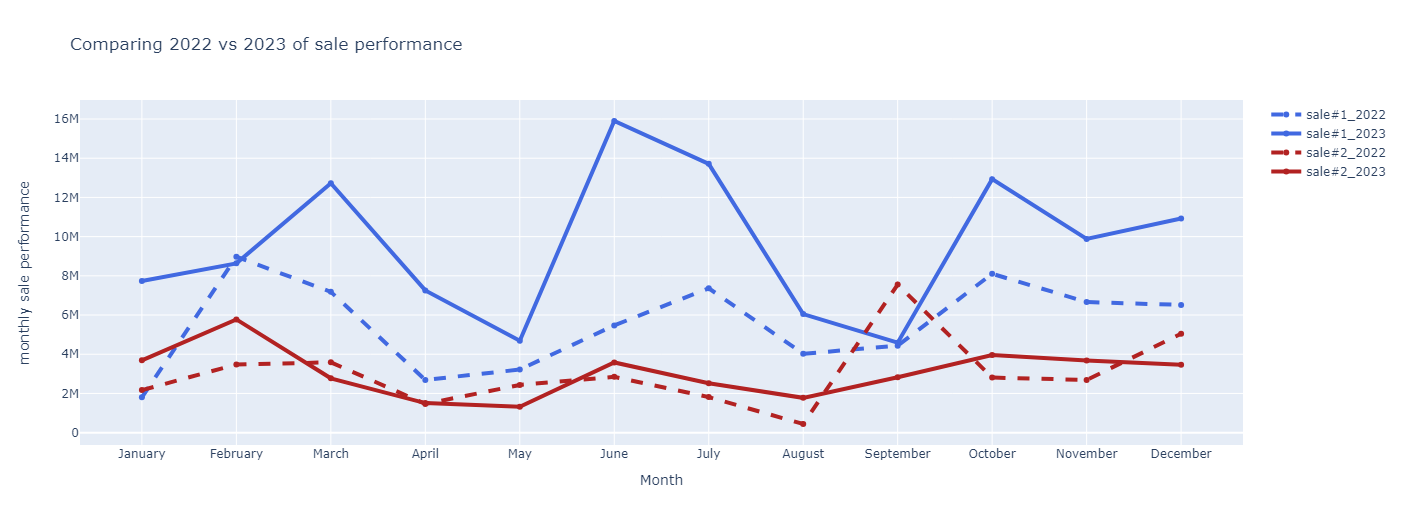

In [2]:
  #  3.2 Explain your data sources
print('Explain your data sources: This data sorce is my company sale performance - mainly for commission calculation and sale performance evaluate')


Explain your data sources: This data sorce is my company sale performance - mainly for commission calculation and sale performance evaluate


In [3]:
  #  3.3 Explain why choose the chart with your data
  print('Explain why choose the chart with your data: I use line chart to show performance compare sale performance for two sale in monthly basis as it easy to see the trend and performance comparision')


Explain why choose the chart with your data: I use line chart to show performance compare sale performance for two sale in monthly basis as it easy to see the trend and performance comparision
